In [1]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 991.0 kB/s eta 0:00:09
     ---------------------------------------- 0.1/8.3 MB 1.1 MB/s eta 0:00:08
      --------------------------------------- 0.2/8.3 MB 1.2 MB/s eta 0:00:07
     - -------------------------------------- 0.2/8.3 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.3/8.3 MB 1.3 MB/s eta 0:00:07
     - -------------------------------------- 0.3/8.3 MB 1.3 MB/s eta 0:00:07
     - -------------------------------------- 0.4/8.3 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.4/8.3 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/8.3 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/8.3 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/8.3 MB 1.2 MB/s eta 0:00:07
     --- ------------------------------------ 0.7/8.3 MB 1.2 MB/s eta

In [2]:
!pip show scikit-learn
# version check

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\user\miniconda3\envs\py\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [4]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     --------- ----------------------------- 61.4/250.0 kB 1.1 MB/s eta 0:00:01
     ------------------ ------------------- 122.9/250.0 kB 1.2 MB/s eta 0:00:01
     -------------------------- ----------- 174.1/250.0 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')


In [6]:
train_df  # 아버지의 키가 아들의 키에 영향을 미칠것인가?
# 아버지의 키 : x, 아들의 키 : y
# 아버지 키 값에 따라아들의 키가 분포함

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068
...,...,...
750,186.182,172.466
751,167.132,154.940
752,181.102,173.482
753,179.578,176.022


In [8]:
x_train_df = train_df.drop(['Son'], axis=1) # train_df['Father'] : 권장x
x_test_df = test_df.drop(['Son'], axis=1)
y_train_df = train_df['Son']
y_test_df = test_df['Son']
# 데이터의 x,y를 나눔
# 단항 회귀

In [9]:
x_train = x_train_df.to_numpy() #x_train.values
#데이터프레임을 지원하지 않는 머신러닝 프레임워크도 있기 때문에 데이터프레임을 넘파이 배열로 변환
x_test = x_test_df.to_numpy()

In [11]:
y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

In [12]:
# 아버지 키를 입력하면 아들의 키를 예측
# 아들의 키는 무한대의 숫자 중 1개 -> 선형 회귀 사용
# LinearRegression : wx+b 공식을 제공하는 estimator

model = LinearRegression() # instance화 시킴
# fit_intercept : b값을 고정함

model.fit(x_train, y_train)
# fit : 추정기(estimator)에 데이터를 넣음

LinearRegression()

In [13]:
model.coef_, model.intercept_
# w, b값 만들기

(array([0.51820601]), 85.30837062148483)

In [ ]:
# 트레이닝 자료 값의 오차가 작아야 이 w,b를 사용할 수 있음
# 훈련자료의 오차를 확인함

# 1번. y_train 값 - (x_train*model.coef_+model.intercept_)
# 2번. 각각항목을 1번의 제곱근으로 작업하고, 더한 뒤 평균을 낸 작업

In [14]:
test1_ypredict=160.782*model.coef_+model.intercept_
test2_ypredict=166.116*model.coef_+model.intercept_
test1_ypredict, test2_ypredict
#검증

(array([168.62656977]), array([171.39068065]))

In [15]:
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

In [ ]:
model.score(x_test, y_test) # r제곱이라는 공식이 있음-> 회귀 공식에만 사용. 1에 가까울수록 좋음

In [16]:
# 위의 자료가 잘 되었다면 w,b 값이 잘 fit 되어서 스코어 값이 좋다면
# 테스트 자료에 사용
# 위의 스코어값에서 확인하든 다른 방법으로 확인하든 결과값이 좋으면
# 기존의 y값과 비교가 가능하므로
# y값이 존재하지 않는 자료에 활용 - 일종의 확률값을 보여줌
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

### 로지스틱 회귀 모델

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']
#  

In [33]:
uniqueData=np.unique(y_data, return_counts=True) # 값의 편향성 여부 확인
# 카테고리컬 분류의 경우 y가 쏠리지 않았는지 확인하는 작업이 필요
# y의 편향 해결 또한 고민할 부분임

# %로 나타내기
print('데이터 단일값:==>',uniqueData[0])
print('데이터단일값갯수:==>',uniqueData[1])

for x in range(len(uniqueData[0])):
    print(uniqueData[0][x],'==>', uniqueData[1][x]/np.sum(uniqueData[1]))
# print(uniqueData[1][0]/np.sum(uniqueData[1]))
# print(uniqueData[1][1]/np.sum(uniqueData[1]))

데이터 단일값:==> [0 1]
데이터단일값갯수:==> [5 7]
0 ==> 0.4166666666666667
1 ==> 0.5833333333333334


데이터 단일값:==> ['a' 'b' 'c' 'd' 'e' 'f']
데이터단일값갯수==> [7 2 1 1 1 1]


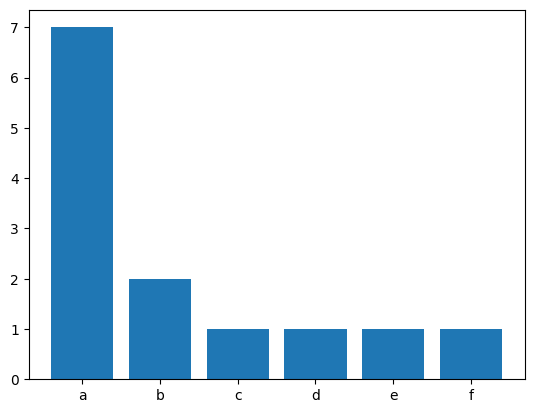

a ==> 0.5384615384615384
b ==> 0.15384615384615385
c ==> 0.07692307692307693
d ==> 0.07692307692307693
e ==> 0.07692307692307693
f ==> 0.07692307692307693


In [35]:
def un(y_data):
    import numpy as np
    import matplotlib.pyplot as plt

    uniqueData=np.unique(y_data, return_counts=True)
    print('데이터 단일값:==>',uniqueData[0])
    print('데이터단일값갯수==>',uniqueData[1])
    plt.bar(uniqueData[0], uniqueData[1])
    plt.show()

    for x  in range(len(uniqueData[0])):
        print(uniqueData[0][x],'==>',uniqueData[1][x]/np.sum(uniqueData[1]))

un('a,b,a,a,a,b,a,a,c,a,d,e,f'.split(','))

### 훈력, 테스트 데이터 나누기
- 중요! 데이터 편향없이 잘 나누어줌, 훈련자료에는 모든 클래스가 다 있어야함
### train_test_split

데이터 단일값:==> [0 1]
데이터단일값갯수==> [3 5]


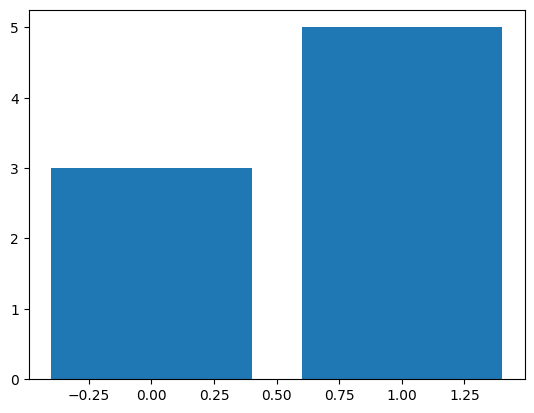

0 ==> 0.375
1 ==> 0.625


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.3,
                                                    random_state=777,
                                                    stratify=y_data)
# train_test_split 옵션 확인
un(y_train) # 37:65

In [63]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([3, 5], dtype=int64)),
 (array([0, 1]), array([2, 2], dtype=int64)))

데이터 단일값:==> [0 1]
데이터단일값갯수==> [3 5]


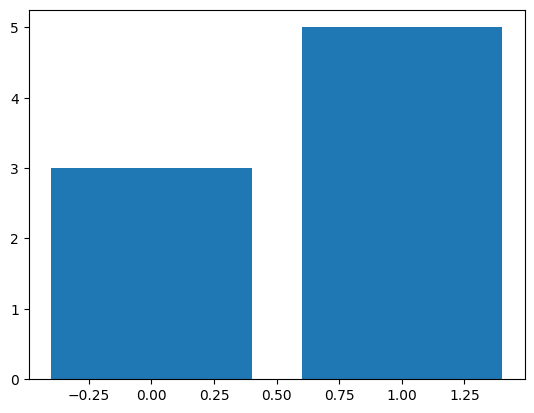

0 ==> 0.375
1 ==> 0.625


In [64]:
un(y_train)

In [23]:
model2=LinearRegression()
model2.fit(x_data, y_data)
print(model2.coef_, model2.intercept_)
print(x_data[:,0])

# 선형회귀로 했다면
# [2, 1] 값의 예측값은?
2*model2.coef_[0] + 1*model2.coef_[1] + model2.intercept_, model2.predict(x_data)[0]
# x1*w1 + x2*w2 + b
# x1과 x2 중에 어떤 것이 영향이 더 큰가?
# x1이 회귀 변수가 더 큼 -> 더 큰 영향을 미침, 더 중요한 값

[0.14726495 0.03377002] -0.3717131697471452
[2 3 3 5 7 2 8 9 6 9 6 2]


(-0.043413257582836484, -0.043413257582836484)

In [65]:
model2 = LogisticRegression(penalty='none')
model2.fit(x_train, y_train)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [67]:
y_predict = model2.predict(x_test)
y_predict, y_train

# 직접 만든 score 값
# result=y_predict==y_train
# np.unique(result, return_counts=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2964\2872910759.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  result=y_predict==y_train


(array([False]), array([1], dtype=int64))

### 현대 자동차 가격 예측 모델 학습

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')


In [24]:
# 데이터 합치기
df=pd.concat([train_df, test_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      102 non-null    int64  
 1   년식      102 non-null    int64  
 2   종류      102 non-null    object 
 3   연비      102 non-null    float64
 4   마력      102 non-null    int64  
 5   토크      102 non-null    float64
 6   연료      102 non-null    object 
 7   하이브리드   102 non-null    int64  
 8   배기량     102 non-null    int64  
 9   중량      102 non-null    int64  
 10  변속기     102 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 9.6+ KB


c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current fo

<Axes: >

c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph

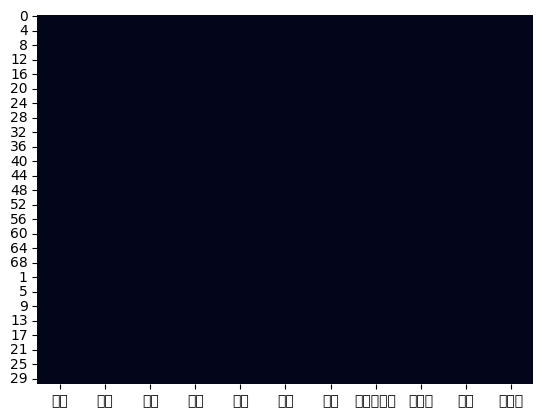

In [28]:
# null 값 존재 확인 -> 머신러닝에는 결측치가 있으면 안 됨
df.isna().sum()

#tmp=df.isna().sum()
#plt.bar(tmp.index, tmp)

# 결측치 시각화를 통해 빠르게 확인가능
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False)

In [44]:
# x,y 변수를 나누고 y값에 영향을 주는 x값을 알기 위해 EDA 실행
# 현대자동차 가격을 예측하는 회귀분석을 위한 x,y 값 나누기
y_data=df['가격']
x_data=df.drop(['가격'],axis=1)
x_data

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
26,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
27,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
28,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
29,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [30]:
# 어떤 것이 문자이고 숫자인지 확인
# x 데이터의 문자 형식이 어떤 자료가 있는지 확인
df.dtypes
# object type 자료들은 get_dummies 시켜야함

가격         int64
년식         int64
종류        object
연비       float64
마력         int64
토크       float64
연료        object
하이브리드      int64
배기량        int64
중량         int64
변속기       object
dtype: object

In [45]:
# 문자자료의 원핫 인코딩
xdummy=pd.get_dummies(x_data)
xdummy

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,False,False,True,False,False,True,False,False,True
1,2015,12.3,204,27.0,0,1591,1300,False,False,True,False,False,True,False,False,True
2,2015,15.0,100,13.6,0,1368,1035,False,True,False,False,False,True,False,True,False
3,2014,14.0,140,17.0,0,1591,1090,False,True,False,False,False,True,False,False,True
4,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2015,8.9,334,40.3,0,3778,1915,True,False,False,False,False,True,False,False,True
27,2015,8.7,175,46.0,0,2497,2383,True,False,False,False,False,False,True,True,False
28,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
29,2010,13.0,95,12.7,0,1399,1046,False,True,False,False,False,True,False,False,True


In [51]:
# 훈련과 테스트 데이터 분리
# 훈련자료 70%로 지정, 항상 같은 자료로 나눌 수 있도록 설정

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdummy,
                                                    y_data,
                                                    test_size=0.3,
                                                    random_state=777)

# 권장사항 스케일링

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
scaler = MinMaxScaler()
scaler.fit(x_train)  # x_train의 min하고 max 값을 추출하는 과정
print(scaler.data_min_, scaler.data_max_) # 확인용

# 데이터 변환 - 스케일링 진행
x_train = scaler.transform(x_train) # 스케일링 진행
x_test = scaler.transform(x_test) # 스케일링 진행
# 전처리 과정 끝남

[2010.     6.3   95.    12.7    0.  1368.  1035.     0.     0.     0.
    0.     0.     0.     0.     0.     0. ] [2.015e+03 1.800e+01 4.160e+02 5.200e+01 1.000e+00 5.038e+03 2.383e+03
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00]


In [53]:
# 회귀 분석 (어떤 회귀분석을 할 것인가는 사용자가 선택) -> 92p 참고
# 3개 이상의 모델을 돌려서 가장 성능이 좋은 모델을 제출

from sklearn.linear_model import LinearRegression

# lr=model
lr=LinearRegression()
#lr=LinearRegression(fit_intercept=False) normalize도 진행 가능
lr.fit(x_train, y_train) # w,b 값을 최소제곱법에 의해 결정하는 수식이 적용됨
# x변수 16개
lr.coef_, lr.intercept_ # w,b 값 확인
# 어떤 변수가 가장 영향력이 좋은지 확인

(array([-115.19522289, 1834.16515529, 3329.73161962, -393.39526525,
         172.77975355, 5800.12995696,  849.52051433, -480.05071688,
         258.59978262, -138.16413671, -164.87739469,   50.92870432,
        -248.67298344, -326.74818654, -346.54699381, -177.94547185]),
 0.0)

In [ ]:
# OLS 기반(최소제곱법 기반)
# X 변수끼리는 독립적이어야 한다
# 이러한 독립성을 확인하는 방법으로 분산팽창지수(VIF)가 있다
# VIF가 10이상이면 서로 종속적임(다중공선성)
# X 변수끼리 연관성이 높은 것은 하나를 제거해야함 -> 다시 과정 반복

In [54]:
# 회귀자료 구하기 - 오차율 및 에러율 확인 (327P)
# r2_score : 성공률
from sklearn.metrics import mean_squared_error, r2_score

# ypred : 테스트 데이터의 예측값
ypred = lr.predict(x_test)  # test 값을 바로 확인하는 이유 : 공식으로 박혀있으므로 train을 확인할 필요 없음
mse = mean_squared_error(y_test, ypred) # 테스트 데이터 예측값과 실제 데이터 값 비교 확인
r2 = r2_score(y_test, ypred) # 적어도 40% 이상은 나와야함
rmse = np.sqrt(mse)

mse, rmse, r2

(1347291.2900527578, 1160.7287754048134, 0.7776980634047943)

In [57]:
# 변수 영향력을 확인 wx+wx+wx... 에서 발생하는 w 값을 coef_라고 하고 그값의 크기를 확인해서
# 값이 클수록 영향력이 많은 변수라고 함
# 327p 참고

coeff=pd.Series(data=np.round(lr.coef_,1), index=xdummy.columns)
coeff.sort_values(ascending=False)

# 회귀 계수
# 배기량이 현대 자동차 가격을 결정짓는 가장 큰 요소
# 328p 참고

배기량       5800.1
마력        3329.7
연비        1834.2
중량         849.5
종류_소형      258.6
하이브리드      172.8
연료_LPG      50.9
년식        -115.2
종류_준중형    -138.2
종류_중형     -164.9
변속기_자동    -177.9
연료_가솔린    -248.7
연료_디젤     -326.7
변속기_수동    -346.5
토크        -393.4
종류_대형     -480.1
dtype: float64

In [63]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(lr, xdummy, y_data, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*mse_scores)
avg_rmse = np.mean(rmse_scores)

mse_scores, rmse_scores, avg_rmse

(array([ -281441.11770482,  -385966.78324257,  -472740.86250097,
         -599622.75674234, -2083098.57939799]),
 array([ 530.51024279,  621.26224997,  687.56153361,  774.35312148,
        1443.29434953]),
 811.3962994772726)

In [49]:
# 권장사항 스케일링

# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler 선언 및 Fitting
# scaler = MinMaxScaler()
# scaler.fit(x_train)
# print(scaler.data_min_, scaler.data_max_) # 확인용

# # 데이터 변환 - 스케일링 진행
# scaled_data = scaler.transform(x_train)
# 2번 진행하게되면 결과 값이 이상해짐

[2010.     6.3   95.    12.7    0.  1368.  1035.     0.     0.     0.
    0.     0.     0.     0.     0.     0. ] [2.015e+03 1.800e+01 4.160e+02 5.200e+01 1.000e+00 5.038e+03 2.383e+03
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00]


,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
9,2015,14.0,100,13.6,0,1368,1103,False,True,False,False,False,True,False,False,True
8,2015,10.8,245,36.0,0,1998,1570,False,False,False,True,False,True,False,False,True
17,2015,9.2,282,35.4,0,3342,1900,True,False,False,False,False,True,False,False,True
25,2015,13.0,184,41.0,0,1995,1859,False,False,False,True,False,False,True,False,True
4,2015,6.4,159,23.0,0,2359,1935,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2011,18.0,108,13.9,0,1396,1035,False,True,False,False,False,True,False,True,False
16,2015,14.4,184,41.0,0,1995,1548,False,False,True,False,False,False,True,True,False
38,2012,14.0,114,15.0,1,1591,1297,False,False,True,False,True,False,False,False,True
59,2015,10.7,255,48.0,0,2959,2115,True,False,False,False,False,False,True,False,True


In [48]:
xdummy 
# 총 16개의 자료값으로 구성됨
# 년식의 가장 작은 값은 2010, 가장 큰 값은 2015
# 연비 가장 작은 값 6.3, 가장 큰 값 18

,년식,연비,마력,토크,하이브리드,배기량,중량,종류_대형,종류_소형,종류_준중형,종류_중형,연료_LPG,연료_가솔린,연료_디젤,변속기_수동,변속기_자동
0,2015,11.8,172,21.0,0,1999,1300,False,False,True,False,False,True,False,False,True
1,2015,12.3,204,27.0,0,1591,1300,False,False,True,False,False,True,False,False,True
2,2015,15.0,100,13.6,0,1368,1035,False,True,False,False,False,True,False,True,False
3,2014,14.0,140,17.0,0,1591,1090,False,True,False,False,False,True,False,False,True
4,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2015,8.9,334,40.3,0,3778,1915,True,False,False,False,False,True,False,False,True
27,2015,8.7,175,46.0,0,2497,2383,True,False,False,False,False,False,True,True,False
28,2015,9.6,175,46.0,0,2497,1990,True,False,False,False,False,False,True,False,True
29,2010,13.0,95,12.7,0,1399,1046,False,True,False,False,False,True,False,False,True


In [ ]:
##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['가격'], axis=1)
x_test = test_df.drop(['가격'], axis=1)
y_train = train_df['가격']
y_test = test_df['가격']

In [70]:
x_train.head()

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [69]:
x_train
# 문자 데이터는 사용 불가 -> 문자 데이터를 꼭 x 변수로 사용하려면 무조건 범위 변수화 시켜야함

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [71]:
np.unique(x_train['종류'])

array(['대형', '소형', '준중형', '중형'], dtype=object)

In [73]:
x_train.head(8)

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
5,2015,중형,12.4,200,44.5,디젤,0,2199,1864,자동
6,2015,중형,13.8,200,44.5,디젤,0,2199,1799,자동
7,2014,소형,14.1,100,13.6,가솔린,0,1368,1095,자동


In [ ]:
#print(x_train.columns) #Index(['년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'], dtype='object')

transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')
transformer.fit(x_train)


x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)


#### 트레이닝하고 테스트데이터 나누기
#### [문자 숫자 변환] 1. 레벨인코딩 (117p)
- 문자로된 y값을 숫자로 변형해야 할 때 필수적
    - fit은 값을 유니크하게 바꾸면서 0,1,2,3... 할당
    - transform은 fit된 값을 y값에 적용
- 트레이닝과 테스트 나누기 전에 처음부터 숫자로 변경한 뒤, 트레인과 테스트 자료를 나누는걸 권장
- 만약 나뉘어져 있는 자료라면, 트레이닝에만 fit과 transfrom을 다 하고
- test는 transform만 수행

In [1]:
items=('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 선풍기, 믹서, 믹서').split(',')
items

['tv', ' 냉장고', ' 전자레인지', ' 컴퓨터', ' 선풍기', ' 선풍기', ' 믹서', ' 믹서']

In [2]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

encoder.fit(items) # fit : items 중복 제거 & 0,1,2,3,4의 순서 번호를 갖게함

LabelEncoder()

In [3]:
encoder.classes_
# fit이 끝나는 순간 중복제거한 class가 생성됨
# 중복제거하여 보여줌

array([' 냉장고', ' 믹서', ' 선풍기', ' 전자레인지', ' 컴퓨터', 'tv'], dtype='<U6')

In [4]:
encoder. transform(items)  # transform : fit해서 나온 결과물을 items에 적용

array([5, 0, 3, 4, 2, 2, 1, 1])

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(items)
# fit & transform 동시에 작업 -> 단, 절대 test에는 하면 안 됨!!!!

array([5, 0, 3, 4, 2, 2, 1, 1], dtype=int64)

#### [문자 숫자 변환] 2. 원핫인코딩 (118p)
- 값의 무게를 없애기 위해 0과 1값에 해당하는 더미변수화 시킴
- x 값은 0,1 외에 3개 이상의 카테고리 변수는 원핫 인코딩을 권장 (판다스의 더미변수와 같은 기능)
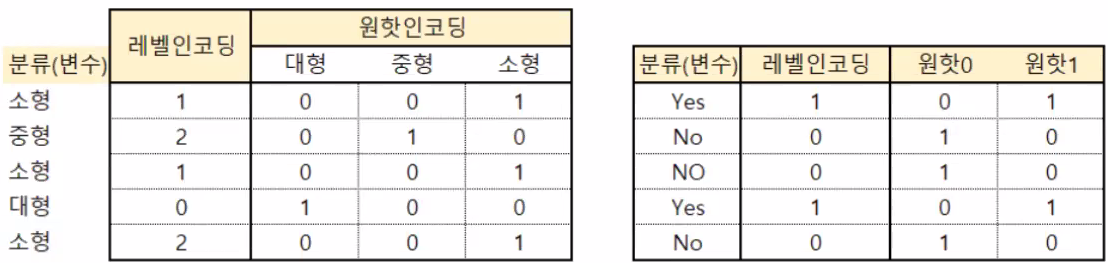
- 인공지능에서는 y값도 이항 또는 다항 분류를 softmax 함수 적용할 때는 반드시 원핫인토딩 해야 함

In [14]:
# onehotencoder 모듈은 결과값이 array로 되어있는 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
items=('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 선풍기, 믹서, 믹서').split(',')
items=np.array(items).reshape(-1,1)

In [16]:
oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
# 2차원 데이터를 입력으로 
oh_encoder.categories_

[array([' 냉장고', ' 믹서', ' 선풍기', ' 전자레인지', ' 컴퓨터', 'tv'], dtype='<U6')]

In [18]:
oh_lebels=oh_encoder.transform(items) # sparse matrix : 0값이 많은 행렬 (희소 행렬)
arrayData=oh_lebels.toarray()  # labels를 다시 array로 변형
arrayData

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

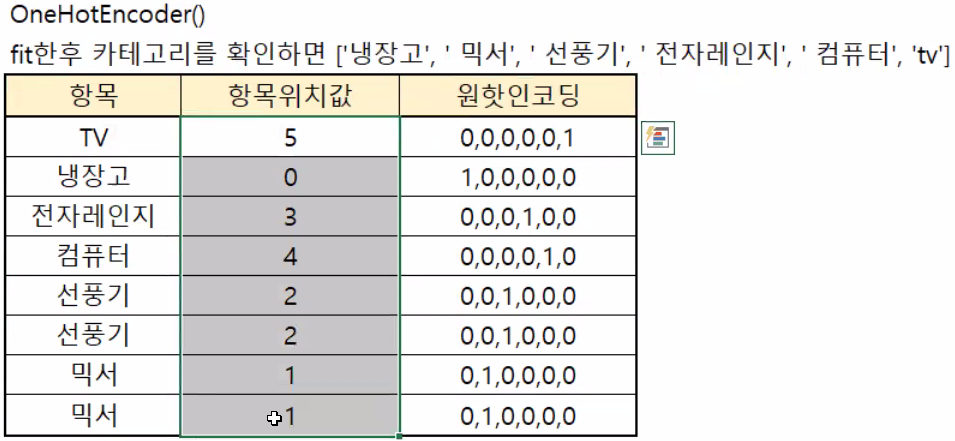

In [20]:
# 참고  arrayData를 다시 tv, 냉장고 등의 글자로 바꾸고자 함
classData=['냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터', 'tv']
maxindex=np.argmax(arrayData, axis=1) # 행단위로 가장 큰 값 찾기

for x in maxindex:
    print(classData[x])

# 인공지능에 많이 사용

tv
냉장고
전자레인지
컴퓨터
선풍기
선풍기
믹서
믹서


### [문자->숫자로 변환] 더미변수화 (119p)
- 카테고리에 해당하는 문자변수를 낱개의 필드(x값)로 쪼갬
- 더미변수가 일정량 이상이면 변환 불가
- 문제점 : 카테고리로 나눈 유니크한 갯수가너무 많으면 x변수로 다 처리가 안 됨
    - 해결방법 : 라쏘 모듈을 사용(L1 정규화)

### 스케일링 & 정규화 (122p)
- 표준화 : standard scaler 
- 정규화 : minmax scaler
- 편차가 왜 중요한가?
    - 데이터량이 커질 수록 편차의 영향이 작음
    - 빅데이터는 이상치 고민을 하지 않음
- 스케일링 작업 또한 test에는 적용하지 않음